<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

import seaborn as sns
import requests

from tqdm.notebook import tqdm
from urllib.parse import urlparse

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
data_name = urlparse(data_url).path.strip('/').split('/')[-1]

In [3]:
# Load the Stack Overflow survey dataset
df = pd.read_csv("survey-data_lab-12-cleaned.csv")

# Display the first few rows of the dataset
df.head(3)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ExperienceLevel,Country_Standardised,Continent,LanguageHaveWorkedWith_list
0,11,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,20,8.0,Project manager,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,JavaScript;Python;Ruby,C#;Crystal;Java;JavaScript;Python;Ruby,JavaScript;Python;Ruby,Elasticsearch;MongoDB;PostgreSQL;SQLite,Elasticsearch;MongoDB;PostgreSQL;SQLite,Elasticsearch;MongoDB;PostgreSQL;SQLite,Amazon Web Services (AWS);Google Cloud,Google Cloud,Google Cloud,Node.js;React;Ruby on Rails,Django;Node.js;React;Ruby on Rails,Node.js;React;Ruby on Rails,NaN,NaN,NaN,NaN,NaN,NaN,Ansible;Docker;Kubernetes,Ansible;Docker;Kubernetes,Ansible;Docker;Kubernetes,Visual Studio Code,Visual Studio Code,Visual Studio Code,Windows;Windows Subsystem for Linux (WSL),Windows,Confluence;GitHub Discussions;Jira;Smartsheet,Confluence;GitHub Discussions;Jira,Confluence;GitHub Discussions;Jira,Discord;Google Meet;Microsoft Teams;Slack;Zoom,Discord;Google Meet;Microsoft Teams;Slack;Zoom,Discord;Google Meet;Microsoft Teams;Slack;Zoom,ChatGPT;GitHub Copilot;Google Gemini;Meta AI;V...,GitHub Copilot;Google Gemini;Visual Studio Int...,GitHub Copilot;Google Gemini;Visual Studio Int...,Stack Overflow for Teams (private knowledge sh...,A few times per week,Yes,Less than once per month or monthly,Quickly finding code solutions;Finding reliabl...,"Yes, definitely",Yes,Favorable,Increase productivity;Speed up learning;Improv...,Somewhat distrust,Neither good or bad at handling complex tasks,Learning about a codebase;Writing code;Documen...,Project planning;Testing code;Generating conte...,Committing and reviewing code;Deployment and m...,NaN,NaN,Learning about a codebase;Writing code;Documen...,NaN,NaN,No,Circulating misinformation or disinformation;M...,Don’t trust the output or answers;AI tools lac...,Yes,Individual contributor,15.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Strongly agr

<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


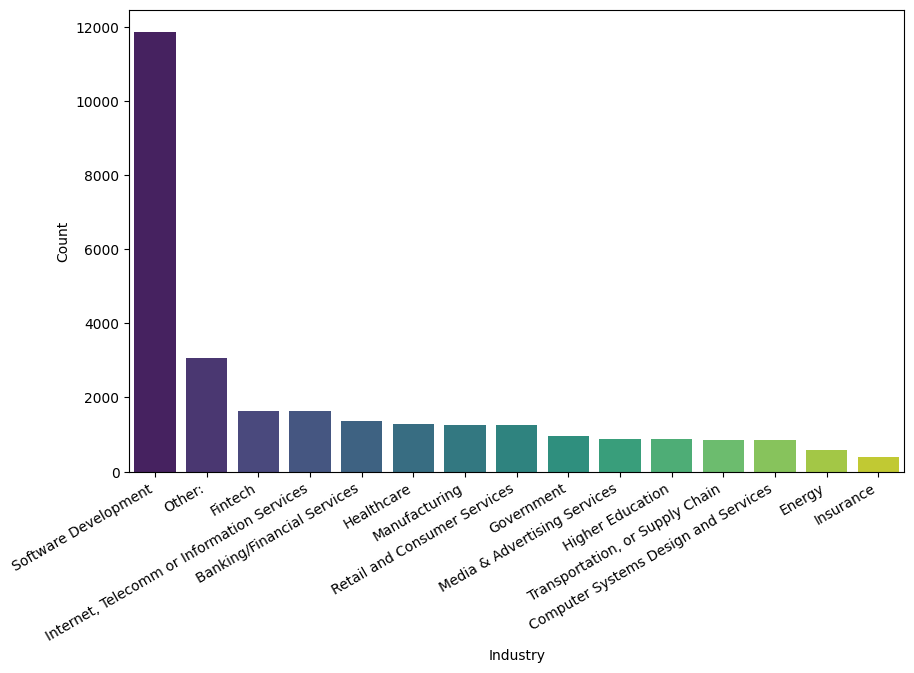

In [4]:
industry = df[["Industry"]].value_counts().reset_index(name='Count')

# Plot
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=industry,
    x='Industry',
    y='Count',
    hue='Industry',
    palette='viridis'
)

plt.xticks(rotation=30, ha='right')

plt.savefig("Lab 14 - Step 2 Bar")

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [5]:
comp = df.dropna(subset="ConvertedCompYearly")[["ConvertedCompYearly"]]
comp

,ConvertedCompYearly
27,7322.0
187,91295.0
194,110000.0
196,161044.0
200,195000.0
209,79481.0
210,170000.0
211,29000.0
214,66592.0
215,85925.0


In [6]:
mean = comp.mean()
median = comp.median()
std_dev = comp.std()

print(mean)
print(median)
print(std_dev)

ConvertedCompYearly    85942.987247
dtype: float64
ConvertedCompYearly    65907.0
dtype: float64
ConvertedCompYearly    172236.44366
dtype: float64


In [7]:
high = mean + 3 * std_dev
print(high)

ConvertedCompYearly    602652.318227
dtype: float64


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [8]:
first_quartile = comp.quantile(0.25).iloc[0]
third_quartile = comp.quantile(0.75).iloc[0]
iqr = third_quartile - first_quartile
print(iqr)

74711.0


In [9]:
lower_bound = max(first_quartile - 1.5 * iqr,0)
upper_bound = third_quartile + 1.5 * iqr

print(lower_bound)
print(upper_bound)

0
220346.5


In [10]:
outliers=comp[(comp["ConvertedCompYearly"] > upper_bound) | (comp["ConvertedCompYearly"] < lower_bound)]
print(f"Number of Outliers: {len(outliers)}")

Number of Outliers: 638


<Axes: xlabel='ConvertedCompYearly'>

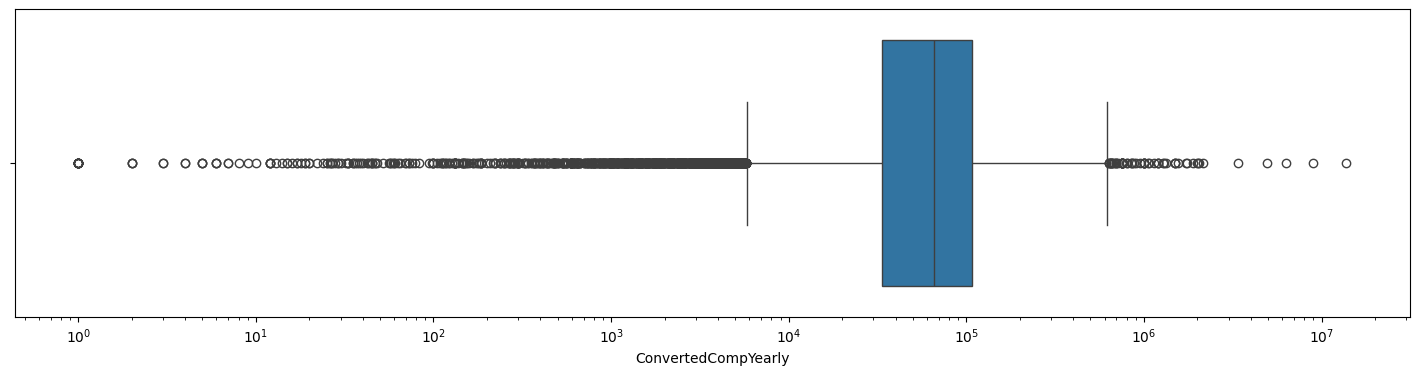

In [11]:
plt.figure(figsize=(18,4))
sns.boxplot(x=comp['ConvertedCompYearly'], log_scale=True)

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [12]:
df = df.dropna(subset="ConvertedCompYearly", axis=0)
len(df)

16075

In [13]:
df = df[(df["ConvertedCompYearly"] < upper_bound) & (df["ConvertedCompYearly"] > lower_bound)]
len(df)

15437

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [14]:
df['Age'].value_counts()

Age
25-34 years old       7171
35-44 years old       4101
18-24 years old       2248
45-54 years old       1385
55-64 years old        446
65 years or older       52
Under 18 years old      27
Prefer not to say        7
Name: count, dtype: int64

In [15]:
df['Age'].dtype

dtype('O')

In [16]:
special_map = {
    'Under 18 years old': 17,
    '65 years or older': 70
}

In [17]:
def extract_median(age_str):
    # Handle special cases first
    if age_str in special_map:
        return special_map[age_str]
    
    # Find two numbers in the string (e.g. "25-34")
    nums = list(map(int, re.findall(r'\d+', age_str)))
    if len(nums) == 2:
        return np.median(nums)  # median of the two ends
    elif len(nums) == 1:
        return nums[0]  # Fallback, though shouldn't occur here
    else:
        return np.nan    # For "Prefer not to say"

df['Age_median'] = df['Age'].apply(extract_median)
df[['Age', 'Age_median']].value_counts()

Age                 Age_median
25-34 years old     29.5          7171
35-44 years old     39.5          4101
18-24 years old     21.0          2248
45-54 years old     49.5          1385
55-64 years old     59.5           446
65 years or older   70.0            52
Under 18 years old  17.0            27
Name: count, dtype: int64

In [18]:
numeric_cols = df.dtypes.reset_index(name='dtype')
numeric_cols = numeric_cols[(numeric_cols['dtype'] != 'object') & (numeric_cols['index'] != "Age_median")]
numeric_cols = numeric_cols['index'].values
numeric_cols

array(['ResponseId', 'YearsCodePro', 'CompTotal', 'WorkExp',
       'JobSatPoints_1', 'JobSatPoints_4', 'JobSatPoints_5',
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8',
       'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11',
       'ConvertedCompYearly', 'JobSat'], dtype=object)

In [19]:
corr_with_age = (
    df[['Age_median'] + list(numeric_cols)]
    .corr()          # you could use 'spearman' if non-linear / ordinal
)

corr_with_age.loc['ResponseId':, 'Age_median']

ResponseId            -0.033655
YearsCodePro           0.815877
CompTotal             -0.024188
WorkExp                0.845363
JobSatPoints_1        -0.041789
JobSatPoints_4        -0.071671
JobSatPoints_5        -0.098816
JobSatPoints_6        -0.054820
JobSatPoints_7        -0.087009
JobSatPoints_8        -0.054534
JobSatPoints_9        -0.086592
JobSatPoints_10       -0.113711
JobSatPoints_11       -0.108752
ConvertedCompYearly    0.380679
JobSat                 0.067167
Name: Age_median, dtype: float64

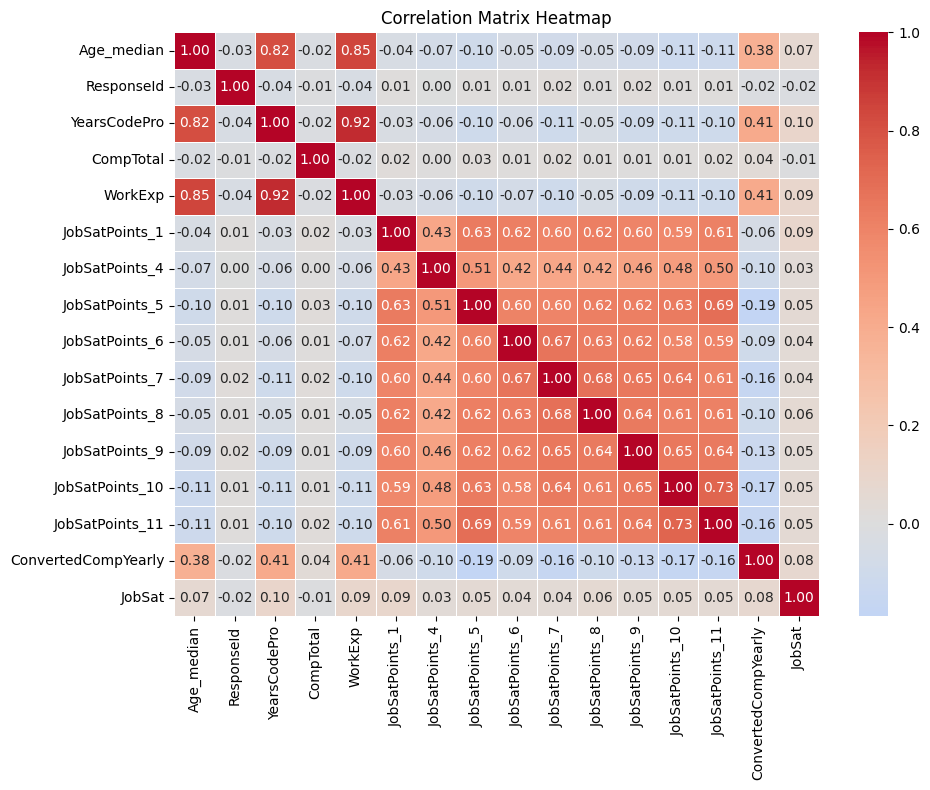

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_with_age,
    # mask=mask,          # comment this out if you want the full matrix
    annot=True,         # show correlation values
    fmt=".2f",
    cmap="coolwarm",    # diverging palette for +/- correlations
    center=0,
    linewidths=0.5
)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()


In [21]:
df.to_csv("survey-data_lab-14-cleaned.csv", index=None)

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
